# Credit data analysis
#### 2024.6.18
#### Chulwon Chae

### Purpose
    - Based on the economic profile data of individuals in Germany, financial product eligibility is determined according to whether a person is deemed creditworthy or not

In [10]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
#import pandas_profiling
from datetime import datetime

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt


# library for sampling 
from imblearn.combine import SMOTEENN

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import shap

%matplotlib inline

## 1. Data Processing 1 

### 1-1 Data Load 

In [11]:
df = pd.read_csv('./data/1.Credit_risk/german_credit_risk_data.csv', sep = ';')
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [12]:
df.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

### 1-2 Duplicated Data 

In [13]:
print('Duplicates : ', len(df[df.duplicated()]))

Duplicates :  0


## 2. Data EDA

### 2-1 Data Type and Summary

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [15]:
df.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [16]:
# Check categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

Creditability int64 [1 0]
Account_Balance int64 [1 2 4 3]
Duration_of_Credit_monthly int64 [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Payment_Status_of_Previous_Credit int64 [4 2 3 0 1]
Purpose int64 [ 2  0  9  3  1 10  5  4  6  8]
Credit_Amount int64 [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366  

In [17]:
# for categorical columns : Change type from int -> object
# unique value, data description
list_casting_as_object = ["Creditability", "Account_Balance", "Payment_Status_of_Previous_Credit", "Purpose", "Length_of_current_employment", "Sex_Marital_Status", "Guarantors", "Duration_in_Current_address", "Most_valuable_available_asset", "Concurrent_Credits", "Type_of_apartment", "Occupation", "No_of_dependents", "Telephone", "Foreign_Worker"]
for column_name in list_casting_as_object:
  df[column_name] = df[column_name].astype("object")
  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account_Balance                    1000 non-null   object
 2   Duration_of_Credit_monthly         1000 non-null   int64 
 3   Payment_Status_of_Previous_Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_Amount                      1000 non-null   int64 
 6   Value_Savings_Stocks               1000 non-null   int64 
 7   Length_of_current_employment       1000 non-null   object
 8   Instalment_per_cent                1000 non-null   int64 
 9   Sex_Marital_Status                 1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_Current_address        1000 non-null   object
 12  Most_va

In [19]:
# Check the number of columns for each data types
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['int64']).columns)
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

21
15
6


In [20]:
target_column = "Creditability"

#### Summary of Data Set
##### - Number of Variables : 21
    numeric variables : 6
    categorical variables : 15 (include target)
##### - Number of observations : 1000
##### - Missing Cells : 0 columns
##### - Duplicated Rows : 0 

### 2-2 Dependent Data Explore

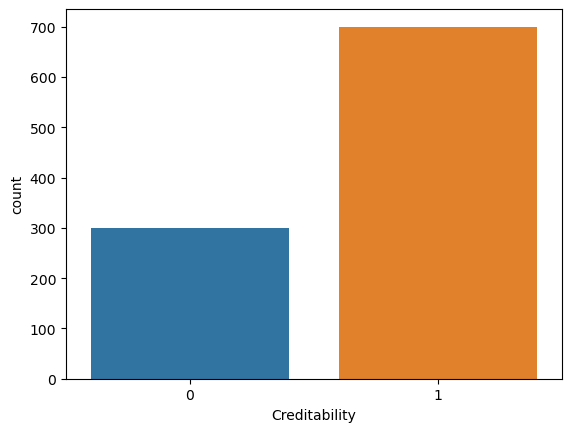

In [21]:
sns.countplot(x=target_column, data=df)
plt.show()
# 7:3 

### 2-3 Independent Data Explore

#### 1) Categorical Data Analysis

In [22]:
# remove target column from catergorical list
list_categorical_columns.remove(target_column)

In [23]:
# check if there is unneccesary columns, ex) only 1 unique value
df[list_categorical_columns].nunique().sort_values()

No_of_dependents                      2
Telephone                             2
Foreign_Worker                        2
Guarantors                            3
Concurrent_Credits                    3
Type_of_apartment                     3
Account_Balance                       4
Sex_Marital_Status                    4
Duration_in_Current_address           4
Most_valuable_available_asset         4
Occupation                            4
Payment_Status_of_Previous_Credit     5
Length_of_current_employment          5
Purpose                              10
dtype: int64

##### Column Distribution

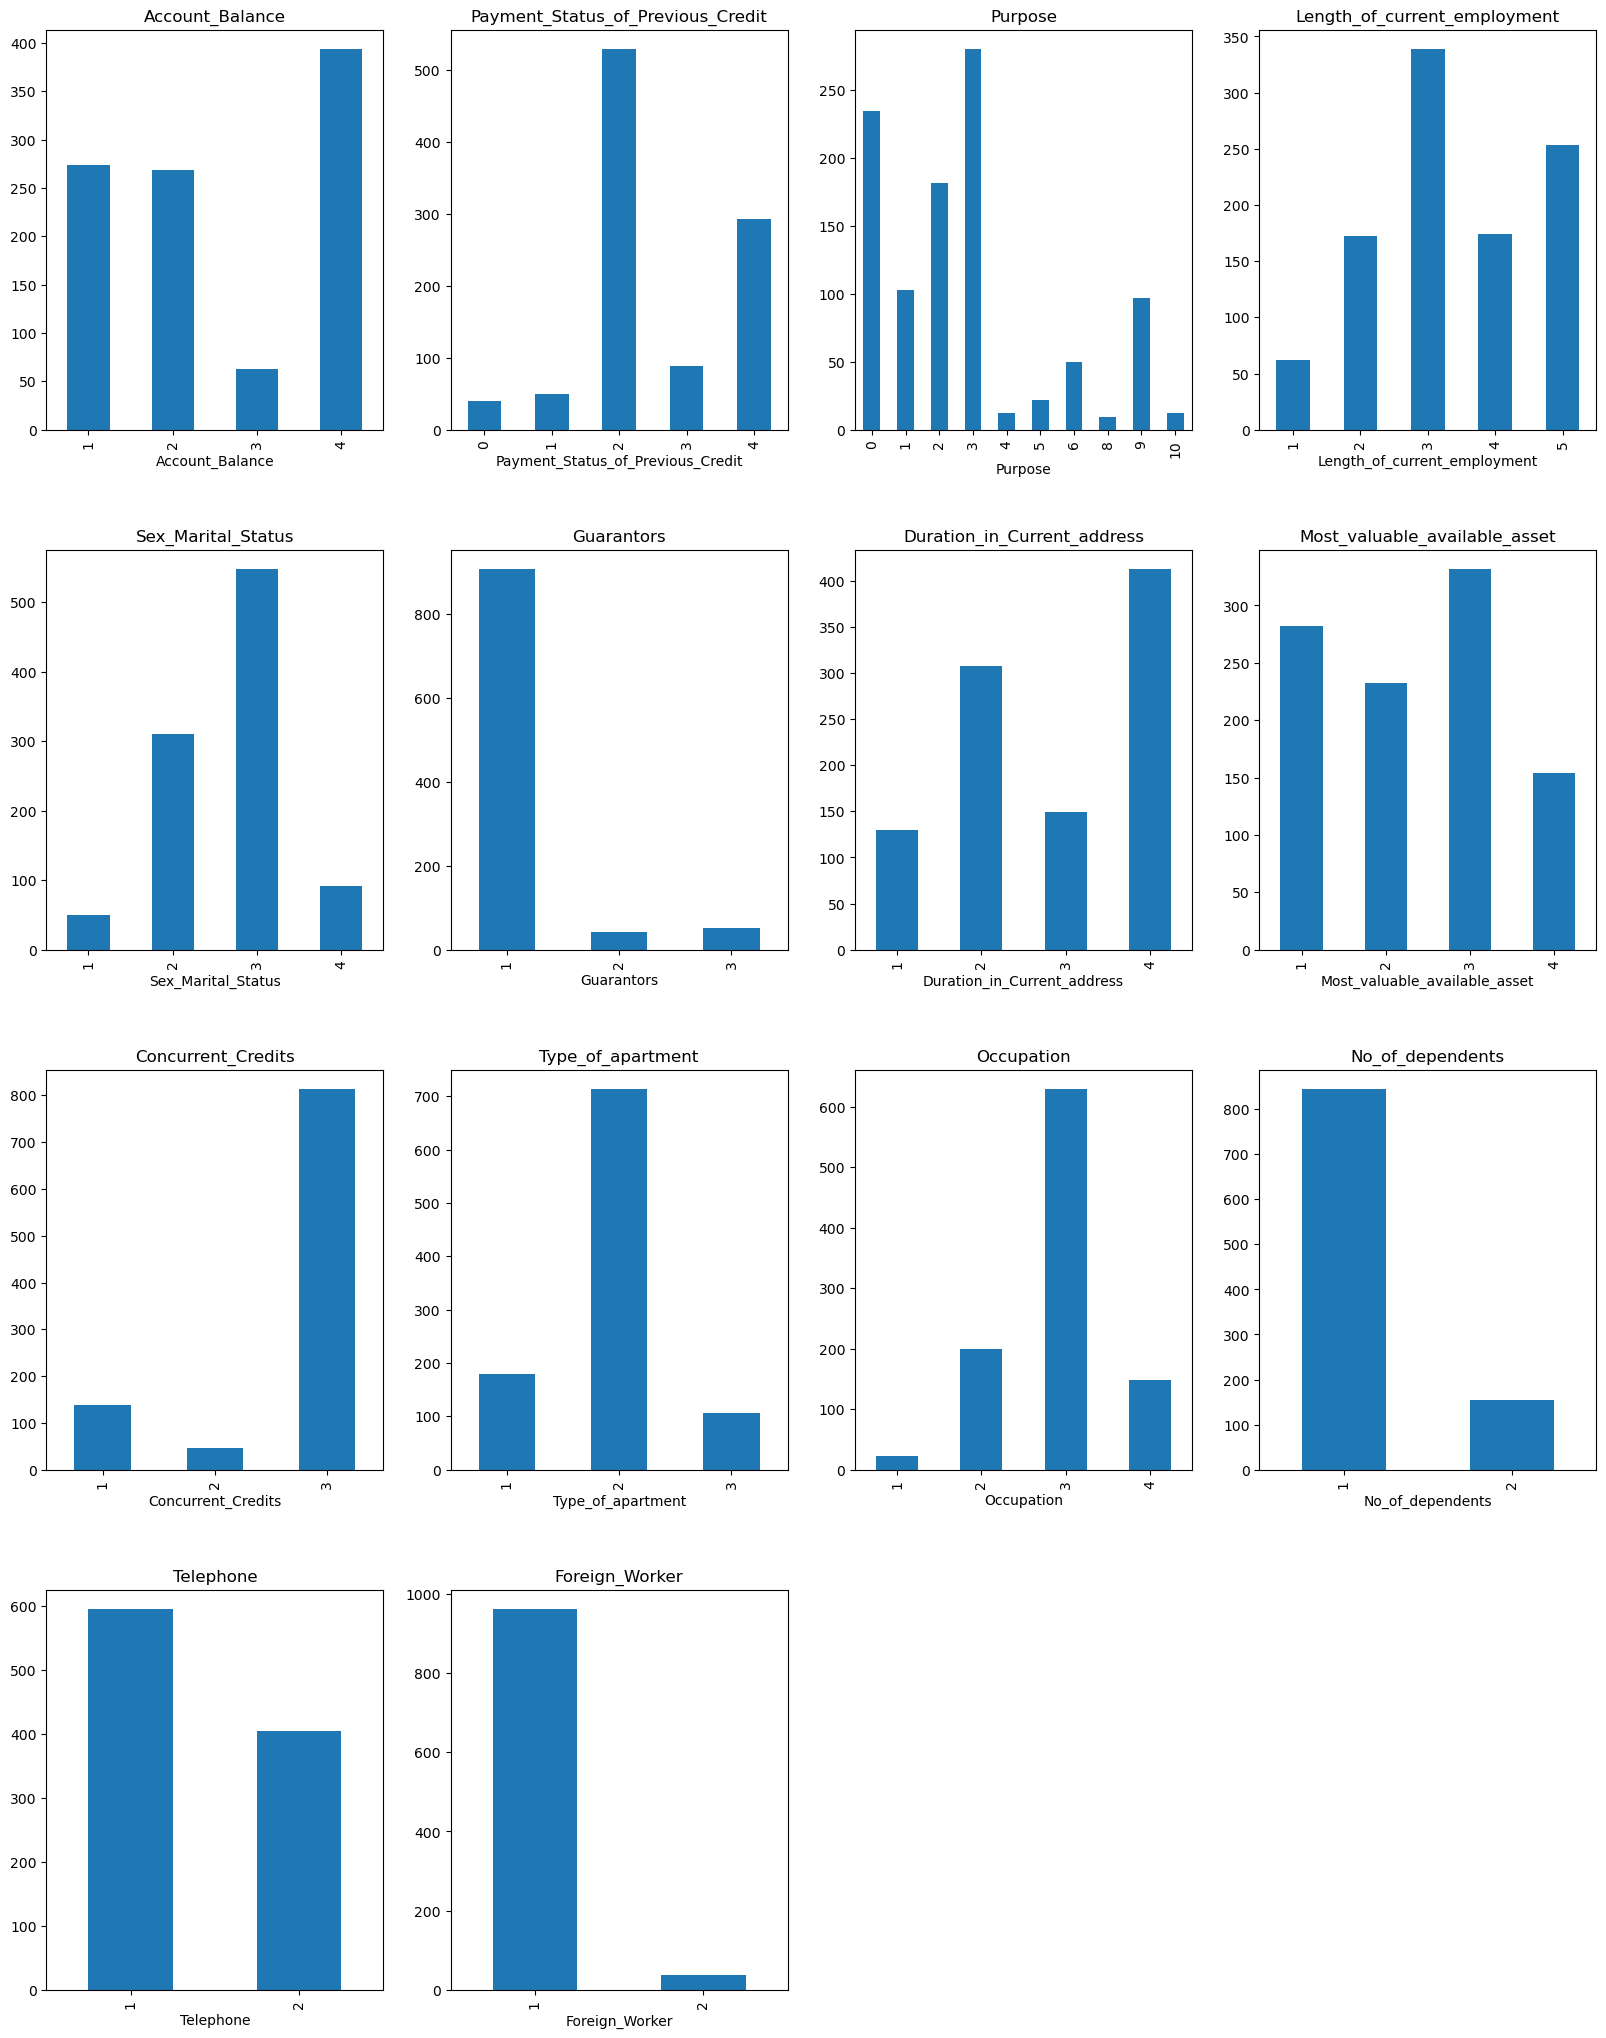

In [24]:
# categorical column dist
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top=0.99,bottom=0.01, hspace=0.3, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(4,4,x)
    x = x+1
    df[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)
plt.show()

##### Target column and categorical column dist related

<Figure size 3000x3000 with 0 Axes>

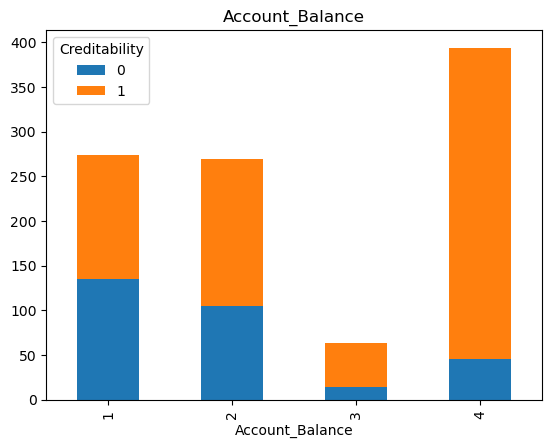

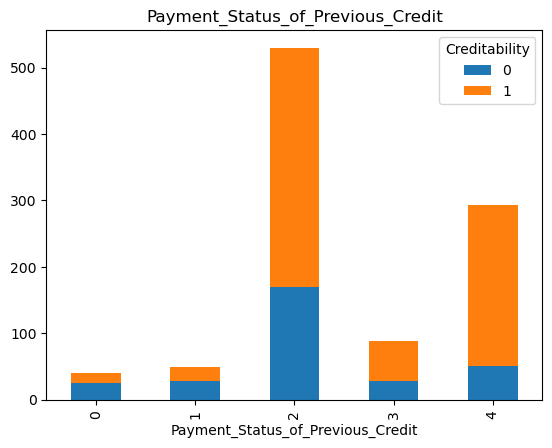

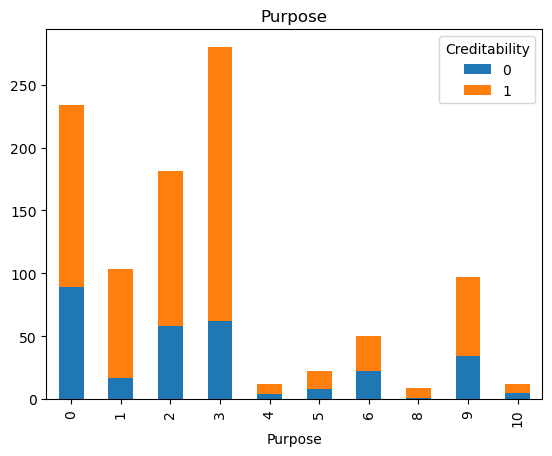

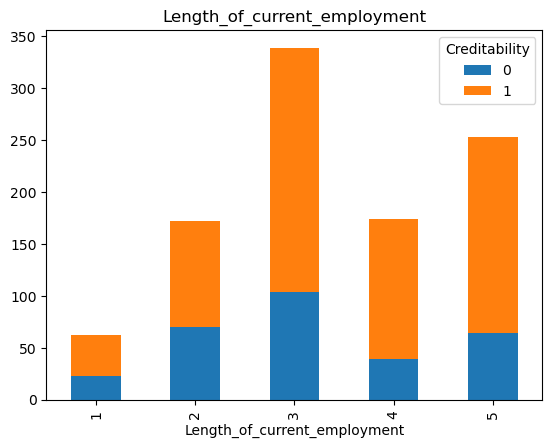

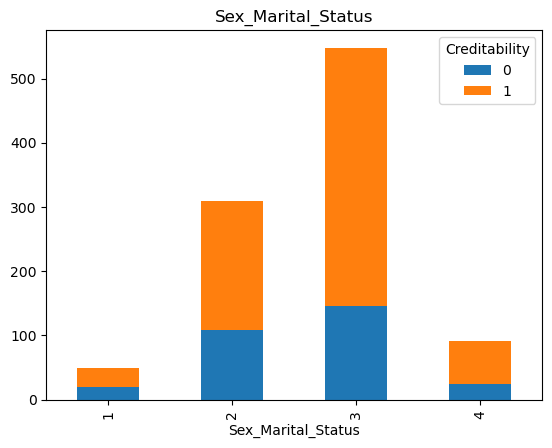

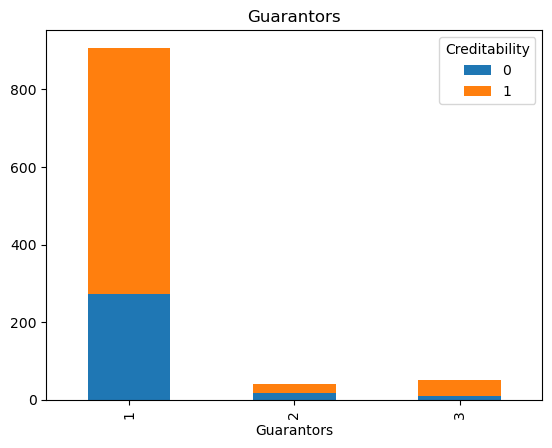

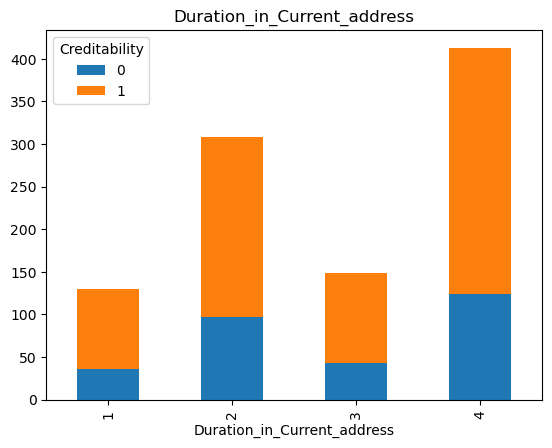

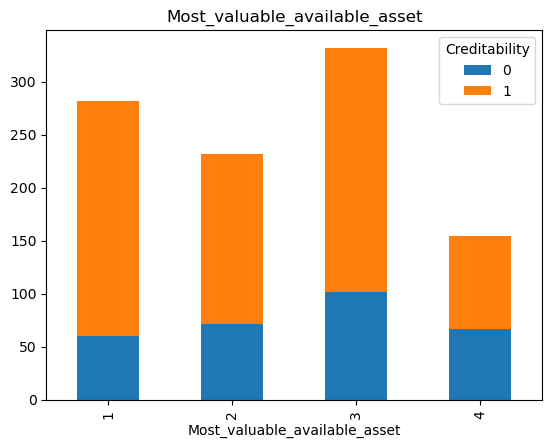

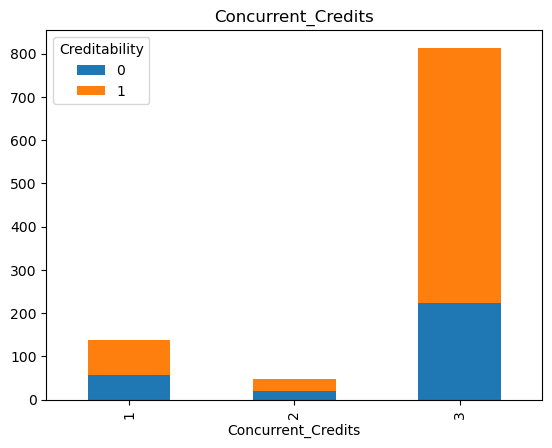

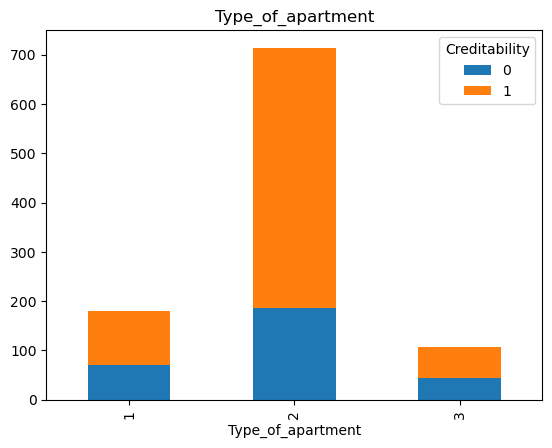

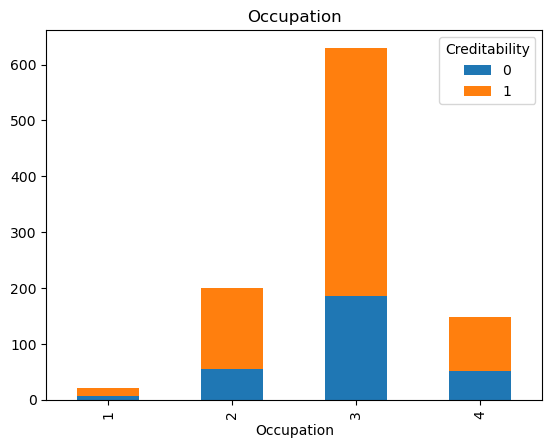

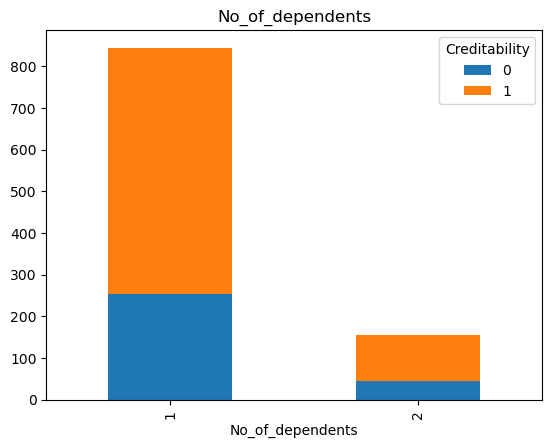

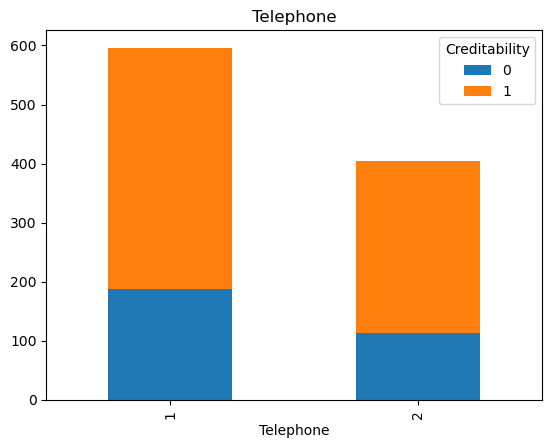

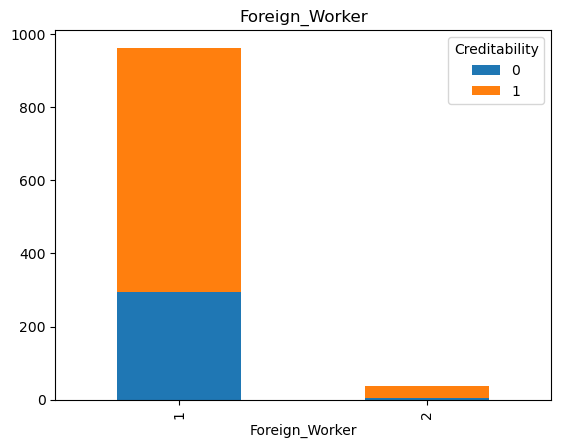

In [25]:
# categorical column and  dependent data(target column)
plt.figure(figsize=(30,30))
x = 1
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.2)
for column_name in list_categorical_columns:
    #plt.subplot(4,4,x)
    x = x+1
    df.groupby([column_name, "Creditability"]).count().iloc[:,1].unstack().plot(kind='bar', stacked=True)
    plt.title(column_name)
plt.show()

#### Chi-Square Test
The chi-square test is an analytical method used for examining the relationship between two categorical variables. For instance, it can be applied to analyze preferences for movie genres based on gender.

- use the chi-square test to investigate the relationship between categorical column data and creditworthiness (Creditability) from dataset. The test will help determine if the observed distribution of data deviates significantly from what would be expected if there were no relationship between the variables.




In [26]:
# calculating Chi-Square
pd.crosstab(df["Creditability"], df["Guarantors"])

Guarantors,1,2,3
Creditability,,,
0,272,18,10
1,635,23,42


In [29]:
list_meaningful_column_by_chi = []
for column_name in list_categorical_columns:
  statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df["Creditability"], df[column_name]))
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("All categorical columns : ", len(list_categorical_columns))
print("Selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

Account_Balance ,  123.7209435162656 ,  1.2189020722893755e-26
Payment_Status_of_Previous_Credit ,  61.69139696459551 ,  1.2791872956750918e-12
Purpose ,  33.35644686141815 ,  0.00011574910079691586
Length_of_current_employment ,  18.3682738466968 ,  0.0010454523491402541
Sex_Marital_Status ,  9.60521395933605 ,  0.02223800546926877
Guarantors ,  6.645366537264244 ,  0.036055954027247206
Duration_in_Current_address ,  0.7492964483880513 ,  0.8615521320413175
Most_valuable_available_asset ,  23.719551283864707 ,  2.8584415733250017e-05
Concurrent_Credits ,  12.839187735866137 ,  0.0016293178186473534
Type_of_apartment ,  18.674005392894895 ,  8.810311250241031e-05
Occupation ,  1.8851560280131707 ,  0.5965815918843431
No_of_dependents ,  0.0 ,  1.0
Telephone ,  1.1725585310208857 ,  0.2788761543035742
Foreign_Worker ,  5.821575915033861 ,  0.015830754902852885
All categorical columns :  14
Selected columns by chi :  10 ['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose', 

##### Insight
1. It has been observed that there is no significant relationship between Creditability (the dependent variable) and some categorical data (4 variables are not significant).
2. The results from point 1 are used for feature selection and model optimization.



#### 2) Numeric Data Analysis

In [30]:
df[list_numeric_columns].nunique().sort_values()
# credit_amount has a lot of unique, need to check 

Instalment_per_cent             4
No_of_Credits_at_this_Bank      4
Value_Savings_Stocks            5
Duration_of_Credit_monthly     33
Age_years                      53
Credit_Amount                 923
dtype: int64

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Credit_Amount', ylabel='Count'>

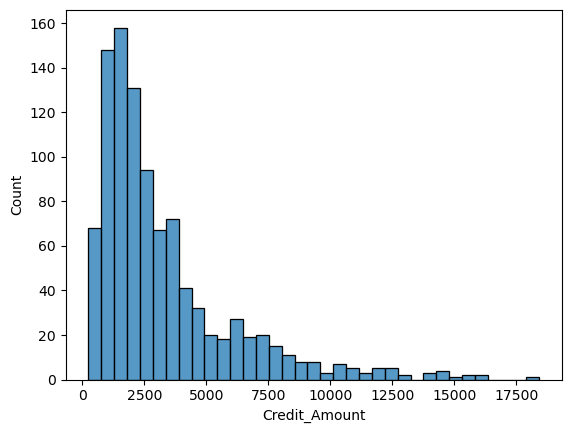

In [31]:
# Since the Credit_Amount shows a number of unique values similar to the count of data entries, it is advised to further verify this by using a histogram plot.
sns.histplot(x="Credit_Amount", data=df)

##### Column distribution

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

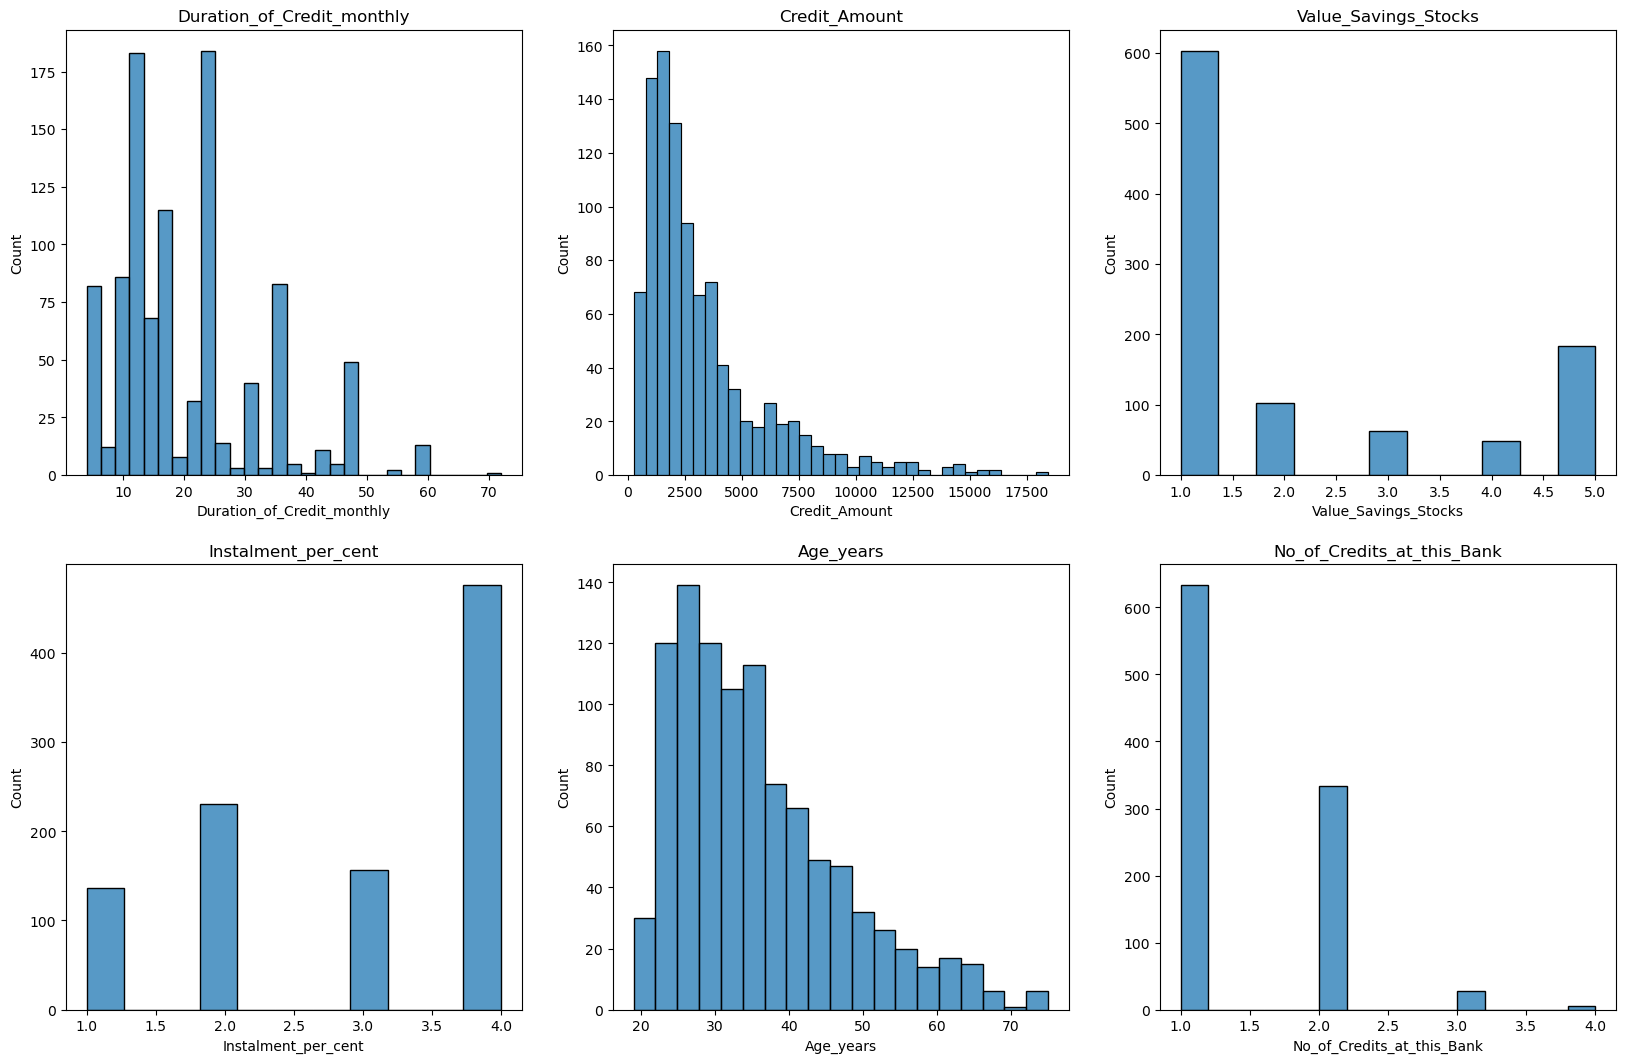

In [32]:
# numeric column dist
plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,3,x)
    x = x+1
    sns.histplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

In [33]:
for column_name in list_numeric_columns:
  print(column_name, "skew : ", skew(df[column_name]))
  print(column_name, "kur : ", kurtosis(df[column_name]))
  

# Need for feature preprocessing using scaling identified for future steps (normality issue)
# Analysis of variance
# Assumptions: normality, homoscedasticity, independence 
# There are some outliers in kurtosis

Duration_of_Credit_monthly skew :  1.0925422109540106
Duration_of_Credit_monthly kur :  0.9091948811374047
Credit_Amount skew :  1.9466686761323513
Credit_Amount kur :  4.265054224176543
Value_Savings_Stocks skew :  1.0151512255589377
Value_Savings_Stocks kur :  -0.6828220851514768
Instalment_per_cent skew :  -0.5305507598158565
Instalment_per_cent kur :  -1.210423225610213
Age_years skew :  1.023174316054808
Age_years kur :  0.6114371688367677
No_of_Credits_at_this_Bank skew :  1.2706663071344098
No_of_Credits_at_this_Bank kur :  1.5904343926328481


/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

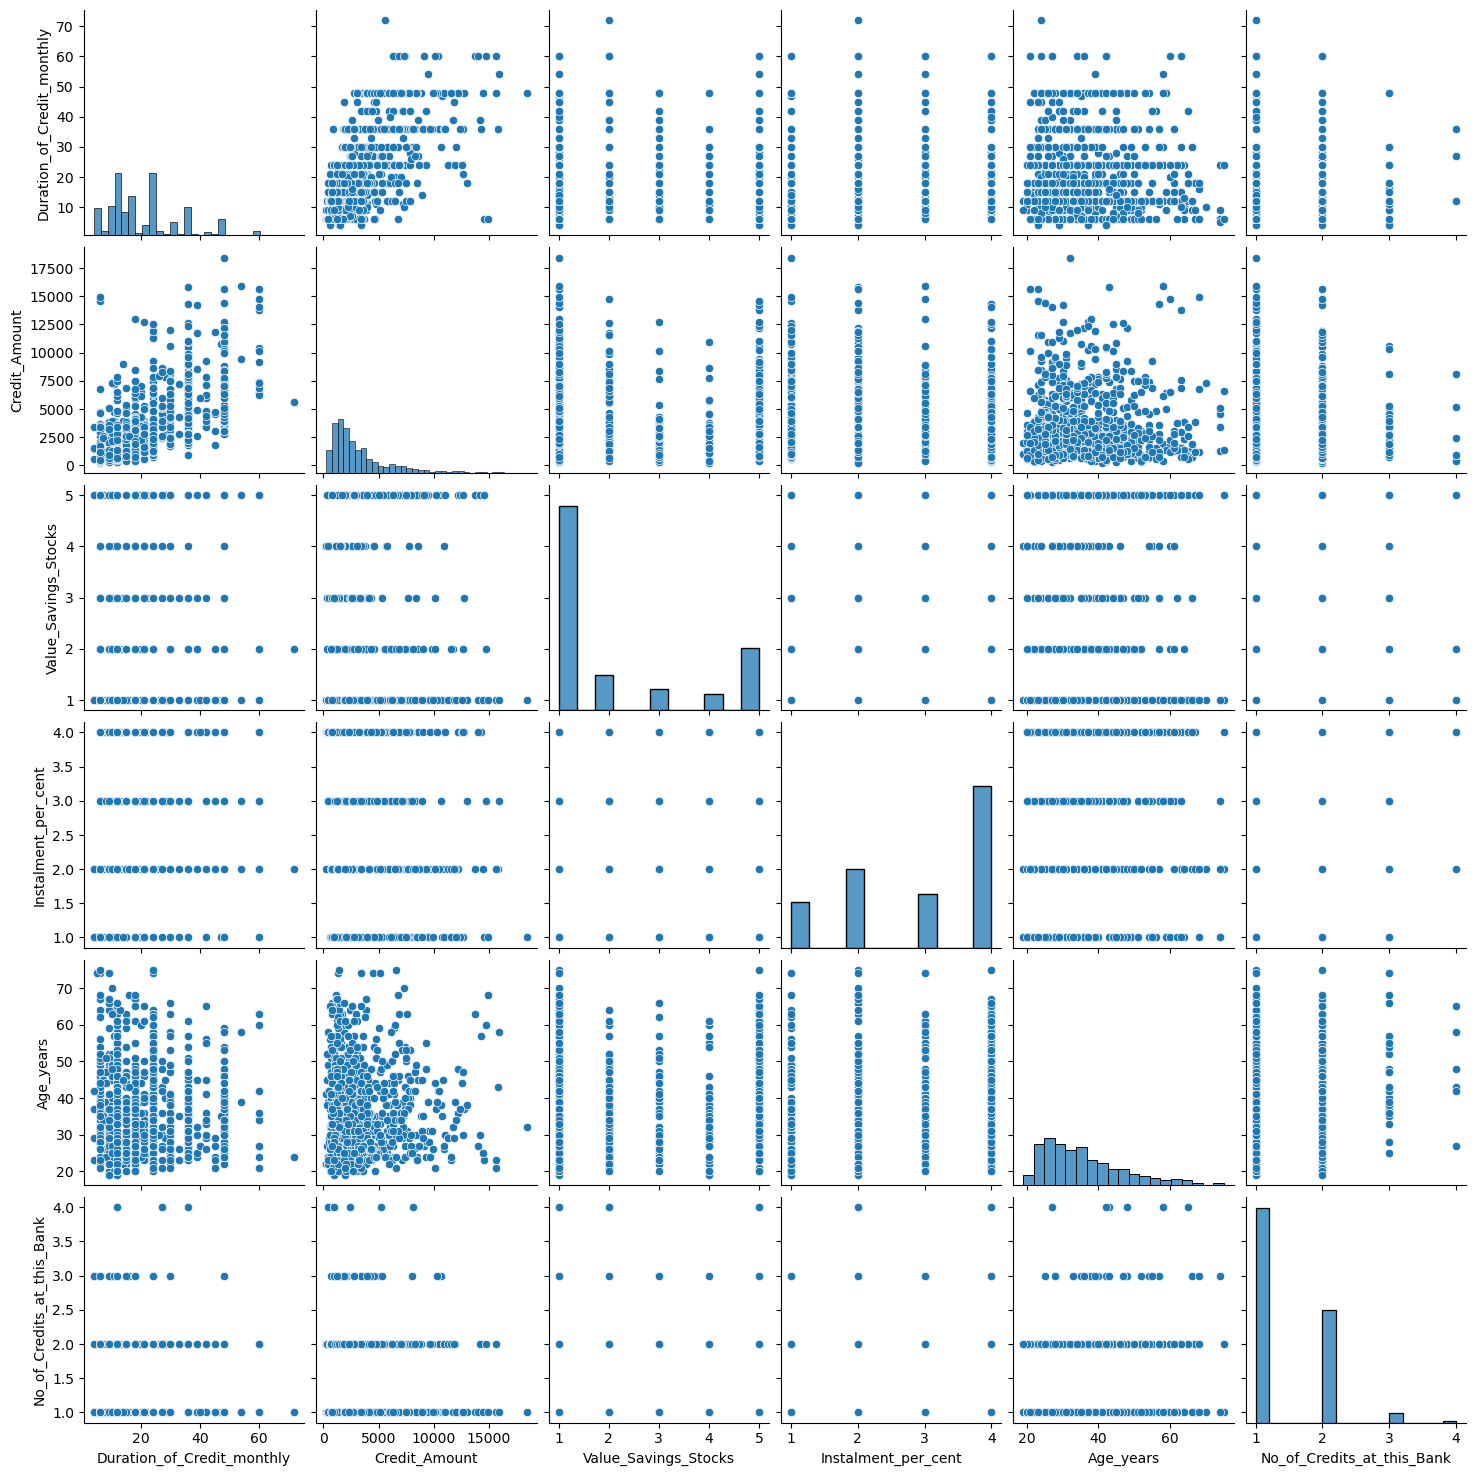

In [34]:
sns.pairplot(data=df.loc[:, list_numeric_columns])

1. There is a tendency for the desired loan amount to increase as the desired loan duration increases.
2. There seems to be no correlation between the amount of savings and the repayment ratio relative to income.
3. People with more than three loans from the same bank do not opt for longer desired loan periods.

##### Correlation Analysis

<Axes: >

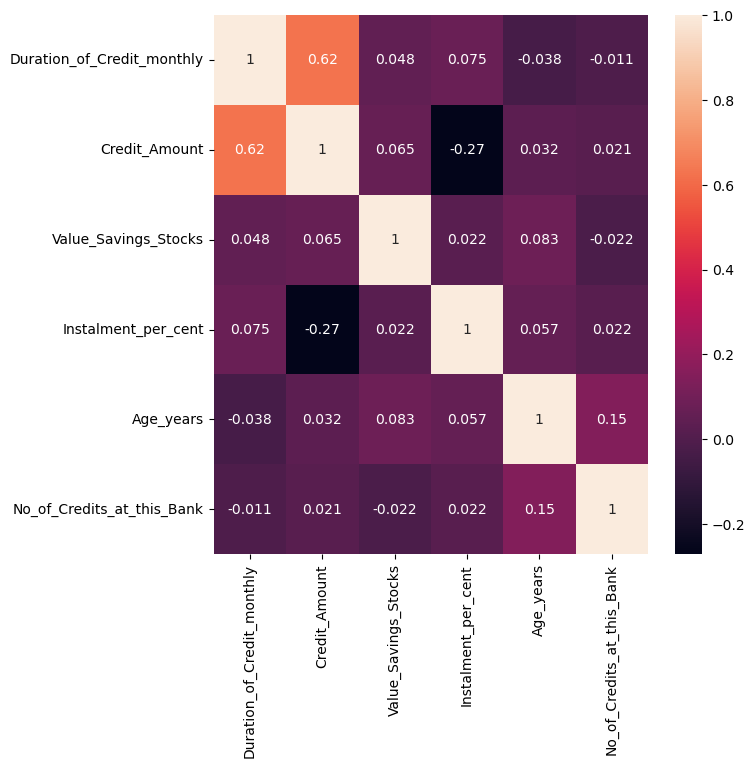

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(df[list_numeric_columns].corr(), annot=True)

##### Target Column & numeric Column dist related

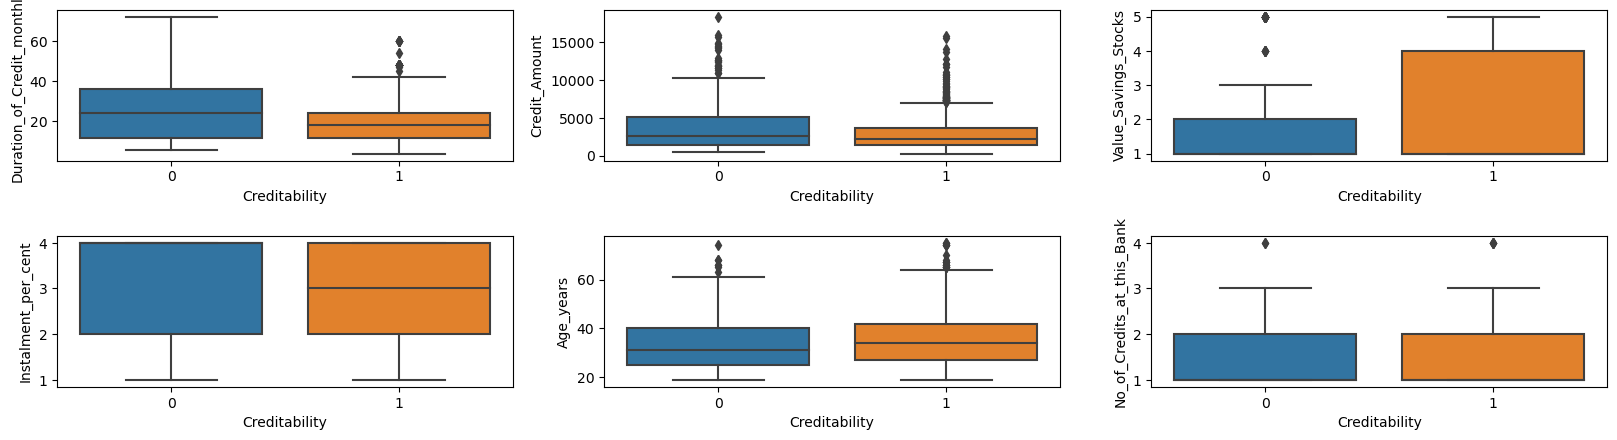

In [36]:
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(9,3,x)
    x = x + 1
    sns.boxplot(data=df,x='Creditability',y=column_name)
plt.show()

##### ANOVA
- Verify the distribution differences of numeric data by category.
- For example, analyze and validate the distribution of height by gender.
- Assumptions: normality, homoscedasticity, independence (if these are not met, the test cannot be trusted).
- Validate the relationship between the distribution of numerical columns and the target column.
- A p-value of less than 0.05 leads to the rejection of the null hypothesis. (The p-value threshold can vary, though it is commonly set at 0.05).


Before we test ANOVA, we need to make sure that dataset has met the assumption (normality, homoscedasticity, independence)
Normaility test
- For variance analysis, the data must statisfy normality. 
- Various methods are used to test for normality : QQ-plot, Shapiro-Wilk test

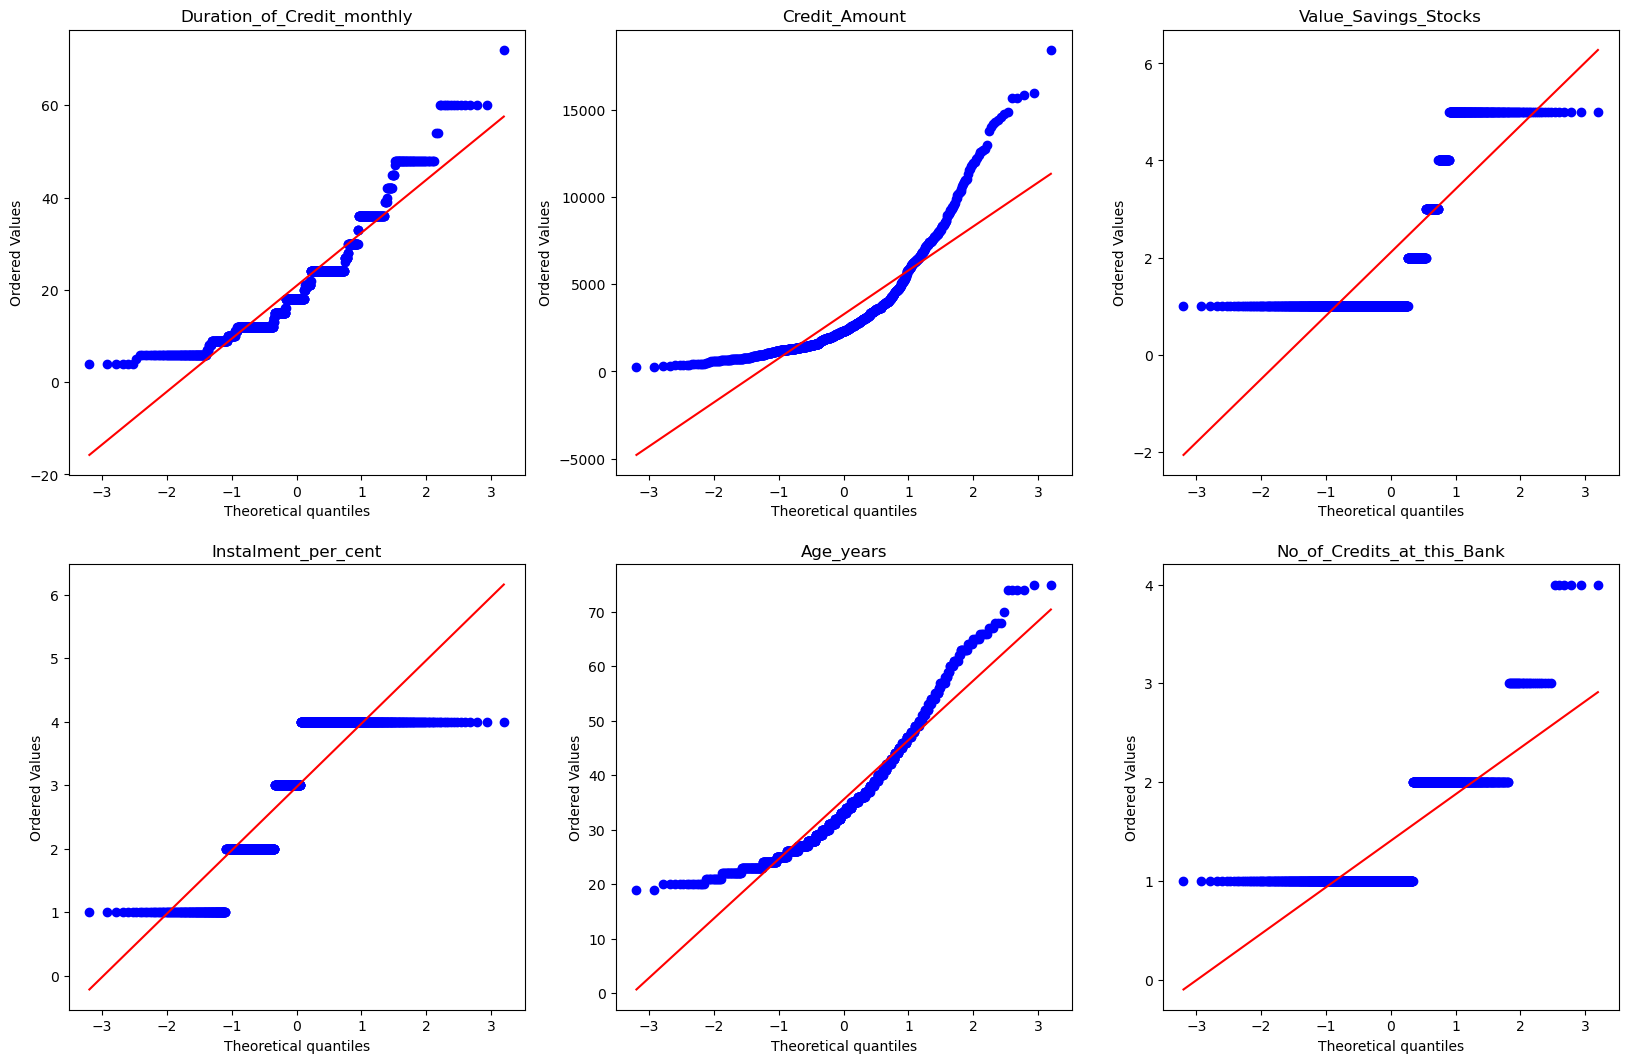

In [37]:
# numeric column 
plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,3,x)
    x = x+1
    stats.probplot(df[column_name], dist=stats.norm, plot=plt) #compare with stats.norm
    plt.title(column_name)
plt.show()

# not really norm dist.

#### Box-Cox 
- transformation is a statistical technique used to stabilize variance and make the data more closely conform to a normal distribution. This transformation is particularly useful when dealing with data that do not meet the assumptions of homoscedasticity (constant variance) or normality, which are required for many statistical tests and regression models.


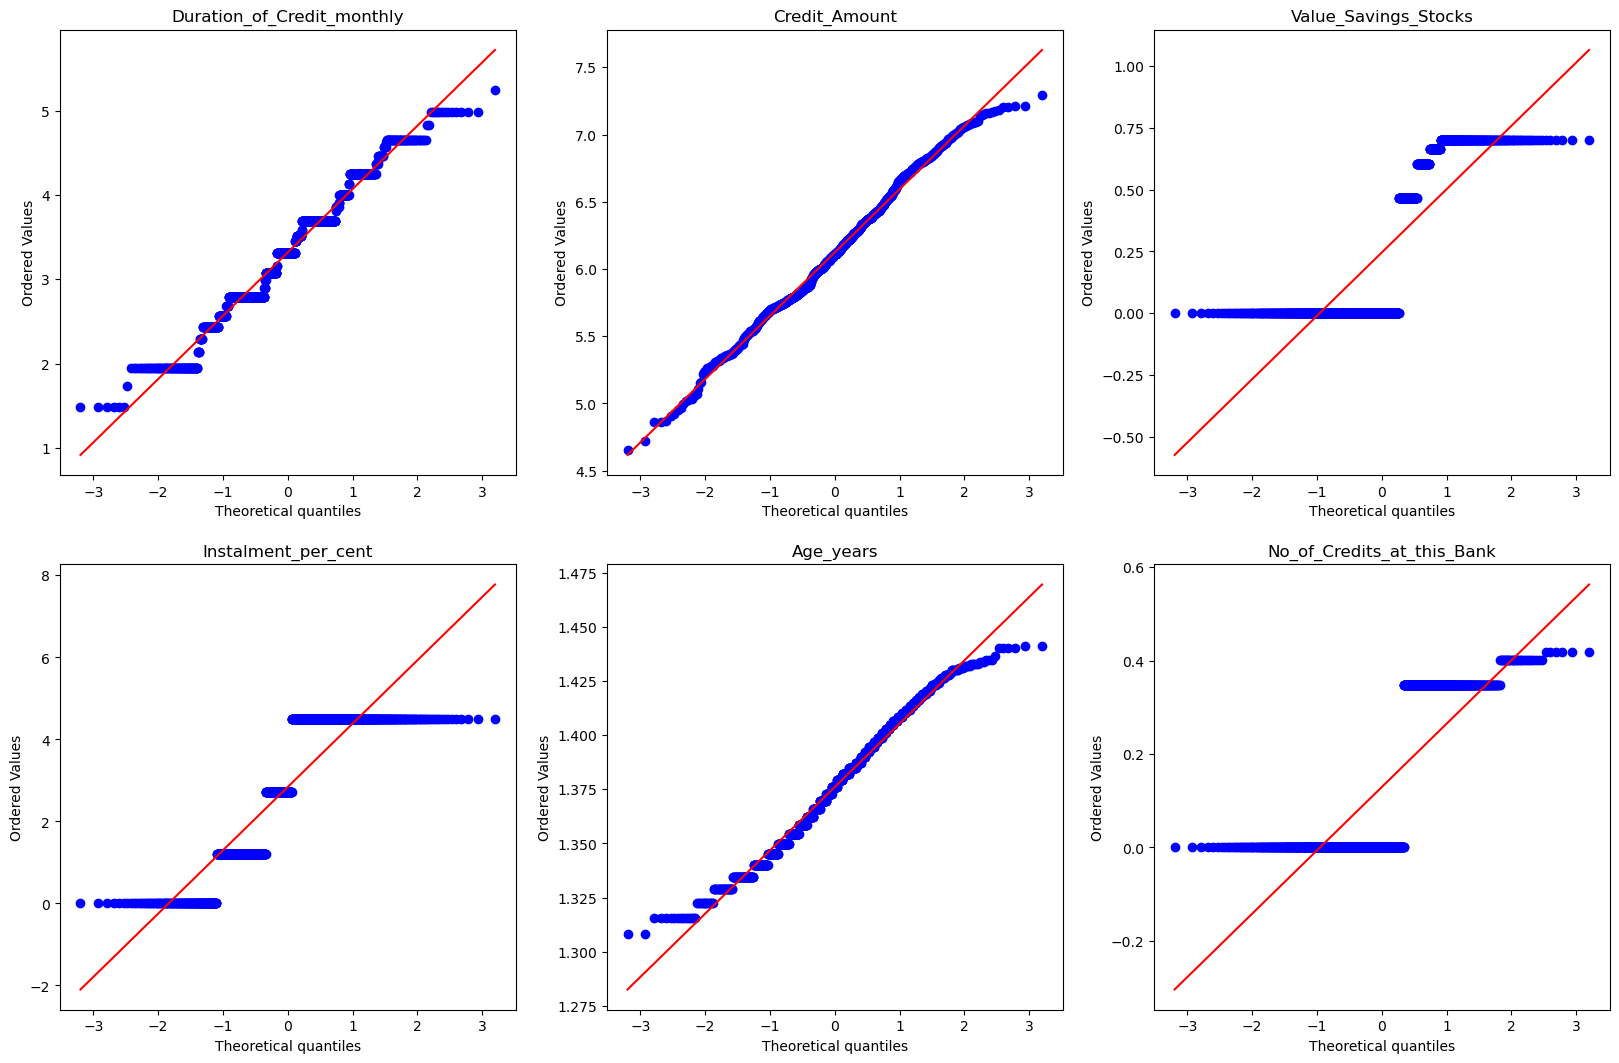

In [38]:
# numeric column 
plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,3,x)
    x = x+1
    stats.probplot(stats.boxcox(df[column_name])[0], dist=stats.norm, plot=plt)
    plt.title(column_name)
plt.show()

# 3 variables are now likely to be normally distributed

#### If normality is not achieved:

- Since normality is not achieved, there is no need for a test of homoscedasticity (equal variance), as it assumes normality.
- It is not possible to conduct a one-way ANOVA for numeric data analysis due to the lack of normality.

##### Instead of ANOVA,
##### Kruskall-Wallis test (Non-parametric Test):

- Because it is a non-parametric test, there is no need to satisfy normality or homoscedasticity.
- However, since it is a non-parametric test, the reliability of the test results is generally lower compared to parametric tests.

In [39]:
# kruskall 
list_meaningful_column_by_kruskall = []

for column_name in list_numeric_columns:
  list_by_value = []
  for value in df[target_column].dropna().unique():
      df_tmp = df[df[target_column] == value][column_name].dropna()
      list_by_value.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_by_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all categorical columns : ", len(list_numeric_columns))
print("selected columns by kruskal : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

Duration_of_Credit_monthly ,  42.263859684710084 ,  7.975280722435737e-11
Credit_Amount ,  7.575879507631307 ,  0.005915450904320812
Value_Savings_Stocks ,  30.663570435469385 ,  3.0687280146351794e-08
Instalment_per_cent ,  5.424750145998911 ,  0.01985327596986272
Age_years ,  12.810120621447924 ,  0.00034474934315396557
No_of_Credits_at_this_Bank ,  2.236544135434218 ,  0.13478191734200565
all categorical columns :  6
selected columns by kruskal :  5 ['Duration_of_Credit_monthly', 'Credit_Amount', 'Value_Savings_Stocks', 'Instalment_per_cent', 'Age_years']


##### Insight

1. It has been observed that among the numerical data, five out of six show significant interactions with Creditability (the dependent variable).
2. The findings from the first point are utilized for feature selection and model optimization.
3. Among the numerical data, there are no cases of high correlation.
4. Some of the numerical data show a tendency for kurtosis values to be higher than skewness values. This suggests that data distribution can be normalized through preprocessing.



## 3. Data Processing 2 

### 3-1 Missing Values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account_Balance                    1000 non-null   object
 2   Duration_of_Credit_monthly         1000 non-null   int64 
 3   Payment_Status_of_Previous_Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_Amount                      1000 non-null   int64 
 6   Value_Savings_Stocks               1000 non-null   int64 
 7   Length_of_current_employment       1000 non-null   object
 8   Instalment_per_cent                1000 non-null   int64 
 9   Sex_Marital_Status                 1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_Current_address        1000 non-null   object
 12  Most_va

In [47]:
df.isna().sum().sort_values(ascending=False)

Creditability                        0
Duration_in_Current_address          0
Telephone                            0
No_of_dependents                     0
Occupation                           0
No_of_Credits_at_this_Bank           0
Type_of_apartment                    0
Concurrent_Credits                   0
Age_years                            0
Most_valuable_available_asset        0
Guarantors                           0
Account_Balance                      0
Sex_Marital_Status                   0
Instalment_per_cent                  0
Length_of_current_employment         0
Value_Savings_Stocks                 0
Credit_Amount                        0
Purpose                              0
Payment_Status_of_Previous_Credit    0
Duration_of_Credit_monthly           0
Foreign_Worker                       0
dtype: int64

### 3-2 Encoding and Feature Selection

In [50]:
Y = df[target_column]
X = df.drop([target_column], axis=1)

##### Label Encoding

In [51]:
Y.unique()
# currently object type

array([1, 0], dtype=object)

In [52]:
le_encoder = LabelEncoder()
Y_encoded = le_encoder.fit_transform(Y)
Y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##### Feature Selection

In [53]:
X_fs = df[list_meaningful_column_by_chi+list_meaningful_column_by_kruskall]
X_fs

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,18,1049,1,4,21
1,1,4,0,3,3,1,1,3,1,1,9,2799,1,2,36
2,2,2,9,4,2,1,1,3,1,1,12,841,2,2,23
3,1,4,0,3,3,1,1,3,1,2,12,2122,1,3,39
4,1,4,0,3,3,1,2,1,2,2,12,2171,1,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,3,3,3,1,1,3,1,1,24,1987,1,2,21
996,1,2,0,5,3,2,1,3,2,1,24,2303,1,4,45
997,4,4,0,5,3,1,4,3,3,1,21,12680,5,4,30
998,2,2,3,1,3,1,4,3,2,1,12,6468,5,2,52


In [54]:
print(len(X.columns))
print(len(X_fs.columns))

20
15


##### Feature Transformation
- Standardization and Normalization are different.
- Normalization scales values to a range of [0,1] (e.g., using MinMaxScaler() from sklearn).
- Standardization uses the standardization of a NORMAL DISTRIBUTION to scale values (e.g., using StandardScaler() from sklearn).



In [55]:
X_fs.head(2)

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,18,1049,1,4,21
1,1,4,0,3,3,1,1,3,1,1,9,2799,1,2,36


In [56]:
scaler = StandardScaler()
X_fs.loc[:, list_meaningful_column_by_kruskall] = scaler.fit_transform(X_fs[list_meaningful_column_by_kruskall]) #for only numerical data
X_fs.head(2)

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_38795/3908186850.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.24085723 -0.9875727  -0.73866754 -0.73866754 -0.73866754 -0.90460432
 -1.07054109 -1.23647786 -0.24085723  0.25695309 -0.82163593  0.75476341
 -1.23647786  2.24819436 -0.24085723 -1.23647786 -0.82163593 -0.24085723
  1.25257373 -0.82163593 -1.23647786 -0.73866754  1.25257373 -0.73866754
 -1.23647786 -0.82163593 -0.73866754 -0.9875727  -0.48976238  1.75038404
  0.75476341  1.25257373  1.25257373  0.25695309 -0.48976238 -1.23647786
 -0.73866754 -0.73866754 -0.24085723  0.25695309 -0.73866754  0.25695309
 -0.24085723  0.25695309 -0.24085723 -0.24085723  0.25695309 -0.24085723
  0.25695309  0.25695309 -0.73866754  1.25257373 -0.9875727  -0.73866754
  0.25695309 -0.73866754 -0.73866754 -0.48976238  0.00804793  1.25257373
 -0.73866754  0.25695309  2.24819436  1.25257373 -0.73866754 -1.236477

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,-0.240857,-0.787657,-0.699707,0.918477,-1.281573
1,1,4,0,3,3,1,1,3,1,1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363


In [57]:
X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
X.head(2)

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_38795/2572249996.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.24085723 -0.9875727  -0.73866754 -0.73866754 -0.73866754 -0.90460432
 -1.07054109 -1.23647786 -0.24085723  0.25695309 -0.82163593  0.75476341
 -1.23647786  2.24819436 -0.24085723 -1.23647786 -0.82163593 -0.24085723
  1.25257373 -0.82163593 -1.23647786 -0.73866754  1.25257373 -0.73866754
 -1.23647786 -0.82163593 -0.73866754 -0.9875727  -0.48976238  1.75038404
  0.75476341  1.25257373  1.25257373  0.25695309 -0.48976238 -1.23647786
 -0.73866754 -0.73866754 -0.24085723  0.25695309 -0.73866754  0.25695309
 -0.24085723  0.25695309 -0.24085723 -0.24085723  0.25695309 -0.24085723
  0.25695309  0.25695309 -0.73866754  1.25257373 -0.9875727  -0.73866754
  0.25695309 -0.73866754 -0.73866754 -0.48976238  0.00804793  1.25257373
 -0.73866754  0.25695309  2.24819436  1.25257373 -0.73866754 -1.236477

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,-0.240857,4,2,-0.787657,-0.699707,2,0.918477,2,1,4,2,-1.281573,3,1,-0.704926,3,1,1,1
1,1,-0.987573,4,0,-0.167384,-0.699707,3,-0.870183,3,1,2,1,0.040363,3,1,1.027079,3,2,1,1


In [58]:
# MinMaxScaler Test
minmax_scaler = MinMaxScaler()
print(minmax_scaler.fit_transform(X_fs[list_meaningful_column_by_kruskall])[:2,:])

[[0.20588235 0.0439639  0.         1.         0.03571429]
 [0.07352941 0.14025531 0.         0.33333333 0.30357143]]


##### One-hot Encoding for categorical column data

In [59]:
X_base = pd.get_dummies(X)
X_fs_final = pd.get_dummies(X_fs)

In [60]:
X_fs_final.columns

Index(['Duration_of_Credit_monthly', 'Credit_Amount', 'Value_Savings_Stocks',
       'Instalment_per_cent', 'Age_years', 'Account_Balance_1',
       'Account_Balance_2', 'Account_Balance_3', 'Account_Balance_4',
       'Payment_Status_of_Previous_Credit_0',
       'Payment_Status_of_Previous_Credit_1',
       'Payment_Status_of_Previous_Credit_2',
       'Payment_Status_of_Previous_Credit_3',
       'Payment_Status_of_Previous_Credit_4', 'Purpose_0', 'Purpose_1',
       'Purpose_2', 'Purpose_3', 'Purpose_4', 'Purpose_5', 'Purpose_6',
       'Purpose_8', 'Purpose_9', 'Purpose_10',
       'Length_of_current_employment_1', 'Length_of_current_employment_2',
       'Length_of_current_employment_3', 'Length_of_current_employment_4',
       'Length_of_current_employment_5', 'Sex_Marital_Status_1',
       'Sex_Marital_Status_2', 'Sex_Marital_Status_3', 'Sex_Marital_Status_4',
       'Guarantors_1', 'Guarantors_2', 'Guarantors_3',
       'Most_valuable_available_asset_1', 'Most_valuable_availab

In [61]:
X_fs_final.head(2)

,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years,Account_Balance_1,Account_Balance_2,Account_Balance_3,Account_Balance_4,Payment_Status_of_Previous_Credit_0,...,Most_valuable_available_asset_3,Most_valuable_available_asset_4,Concurrent_Credits_1,Concurrent_Credits_2,Concurrent_Credits_3,Type_of_apartment_1,Type_of_apartment_2,Type_of_apartment_3,Foreign_Worker_1,Foreign_Worker_2
0,-0.240857,-0.787657,-0.699707,0.918477,-1.281573,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False


In [62]:
X_base.head(2)

,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years,No_of_Credits_at_this_Bank,Account_Balance_1,Account_Balance_2,Account_Balance_3,Account_Balance_4,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No_of_dependents_1,No_of_dependents_2,Telephone_1,Telephone_2,Foreign_Worker_1,Foreign_Worker_2
0,-0.240857,-0.787657,-0.699707,0.918477,-1.281573,-0.704926,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363,1.027079,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False


### 3-3 Summary
##### Total 2 type of feature -> model optimization test 
1.   No Feature Selection (X_base, Y_encoded)
2.   Feature Selection (X_fs_final, Y_encoded)
  

## 4. Model Analysis
0.   base model without Feature Selection
1.   base model with Feature Selection
2.   Model Optimization with random search  

In [63]:
cv = 3
n_jobs = -1

### 4-1. Base Model Learning

In [64]:
list_cast_to_int  = list(X_base.select_dtypes(include=['object']).columns)
X_base.loc[:, list_cast_to_int] = X_base[list_cast_to_int].apply(lambda x : x.astype("int64"))
X_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Duration_of_Credit_monthly           1000 non-null   float64
 1   Credit_Amount                        1000 non-null   float64
 2   Value_Savings_Stocks                 1000 non-null   float64
 3   Instalment_per_cent                  1000 non-null   float64
 4   Age_years                            1000 non-null   float64
 5   No_of_Credits_at_this_Bank           1000 non-null   float64
 6   Account_Balance_1                    1000 non-null   bool   
 7   Account_Balance_2                    1000 non-null   bool   
 8   Account_Balance_3                    1000 non-null   bool   
 9   Account_Balance_4                    1000 non-null   bool   
 10  Payment_Status_of_Previous_Credit_0  1000 non-null   bool   
 11  Payment_Status_of_Previous_Cred

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_base, Y_encoded, test_size = 0.3, random_state = 123, stratify=Y_encoded) #must do stratify for this specific dataset

In [66]:
rf_clf = RandomForestClassifier(max_depth = 4, n_estimators=5)
rf_clf.fit(X_train, y_train)
y_prd = rf_clf.predict(X_test)
y_prd_proba = rf_clf.predict_proba(X_test)[:,-1]
prf_score = precision_recall_fscore_support(y_test, y_prd, average='binary')
score = roc_auc_score(y_test, y_prd_proba)
print("precision, recall, f1score : ", prf_score)
print("roc_auc_score : ", score)

precision, recall, f1score :  (0.7127659574468085, 0.9571428571428572, 0.8170731707317074, None)
roc_auc_score :  0.7129100529100529


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_fs_final, Y_encoded, test_size = 0.3, random_state = 123, stratify=Y_encoded)

In [68]:
rf_clf = RandomForestClassifier(max_depth = 4, n_estimators=5)
rf_clf.fit(X_train, y_train)
y_prd = rf_clf.predict(X_test)
y_prd_proba = rf_clf.predict_proba(X_test)[:,-1]
prf_score = precision_recall_fscore_support(y_test, y_prd, average='binary')
score = roc_auc_score(y_test, y_prd_proba)
print("precision, recall, f1score : ", prf_score)
print("roc_auc_score : ", score)

# this case, feature selection did not help the result.

precision, recall, f1score :  (0.7272727272727273, 0.9523809523809523, 0.8247422680412371, None)
roc_auc_score :  0.7577513227513227


### 4-2. Optimization 2 : RandomForest and RandomizedSearchCV 
##### * We are going to use base model as the result above
##### RandomizedSearchCV란?

- One method to determine the best hyper-parameters when choosing an estimator involves typically three approaches: Grid Search, Random Search, and Bayesian Search.
- Random Search tests combinations of hyper-parameters randomly to find the optimal values.
- Since this process is accompanied by Cross Validation, it produces reliable results.


In [69]:
len(X_test.columns)

48

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_base, Y_encoded, test_size = 0.3, random_state = 123, stratify=Y_encoded)

In [71]:
# Randomsearch
hyper_params_rf_randomized = {"max_features" : sp_randInt(7,10),
                              "max_depth" : sp_randInt(6,20),
                              "n_estimators" : sp_randInt(15,60),
}

rf_clf = RandomForestClassifier(max_depth = 4, n_estimators=5)
random_cv_opt = RandomizedSearchCV(estimator=rf_clf, param_distributions=hyper_params_rf_randomized, n_iter=30, cv = cv, n_jobs = n_jobs, random_state=123, scoring='roc_auc', verbose=1)
random_cv_opt.fit(X_train, y_train)
print('best model hyper-parameter : ', random_cv_opt.best_params_)
y_prd = random_cv_opt.predict(X_test)
prf_score = precision_recall_fscore_support(y_test, y_prd, average='binary')
print("precision, recall, f1score : ", prf_score)
y_prd_proba = random_cv_opt.predict_proba(X_test)[:,-1]
score = roc_auc_score(y_test, y_prd_proba)
print("roc_auc_score : ", score)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:6

best model hyper-parameter :  {'max_depth': 7, 'max_features': 9, 'n_estimators': 37}
precision, recall, f1score :  (0.7490494296577946, 0.9380952380952381, 0.8329809725158562, None)
roc_auc_score :  0.7766666666666667


In [73]:
# Gridsearch Test
hyper_params_rf = {"max_features":[6,9],
                    'max_depth': [8, 15, 20],
                    'n_estimators': [15, 20, 50, 60]
                   }
rf_clf = RandomForestClassifier(max_depth = 4, n_estimators=5)
grid_cv_opt = GridSearchCV(rf_clf, param_grid = hyper_params_rf, cv = cv, n_jobs = n_jobs, scoring='roc_auc', verbose=1)
grid_cv_opt.fit(X_train, y_train)
print('best model hyper-parameter : ', grid_cv_opt.best_params_)
y_prd = grid_cv_opt.predict(X_test)
prf_score = precision_recall_fscore_support(y_test, y_prd, average='binary')
print("precision, recall, f1score : ", prf_score)
y_prd_proba = grid_cv_opt.predict_proba(X_test)[:,-1]
score = roc_auc_score(y_test, y_prd_proba)
print("roc_auc_score : ", score)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
best model hyper-parameter :  {'max_depth': 8, 'max_features': 9, 'n_estimators': 60}
precision, recall, f1score :  (0.7596899224806202, 0.9333333333333333, 0.8376068376068376, None)
roc_auc_score :  0.8018518518518519


### 4-2. Model Analysis

##### Feature Importance

In [74]:
# reproduction
rf_clf = RandomForestClassifier(**random_cv_opt.best_params_)
final_model = rf_clf.fit(X_train, y_train)

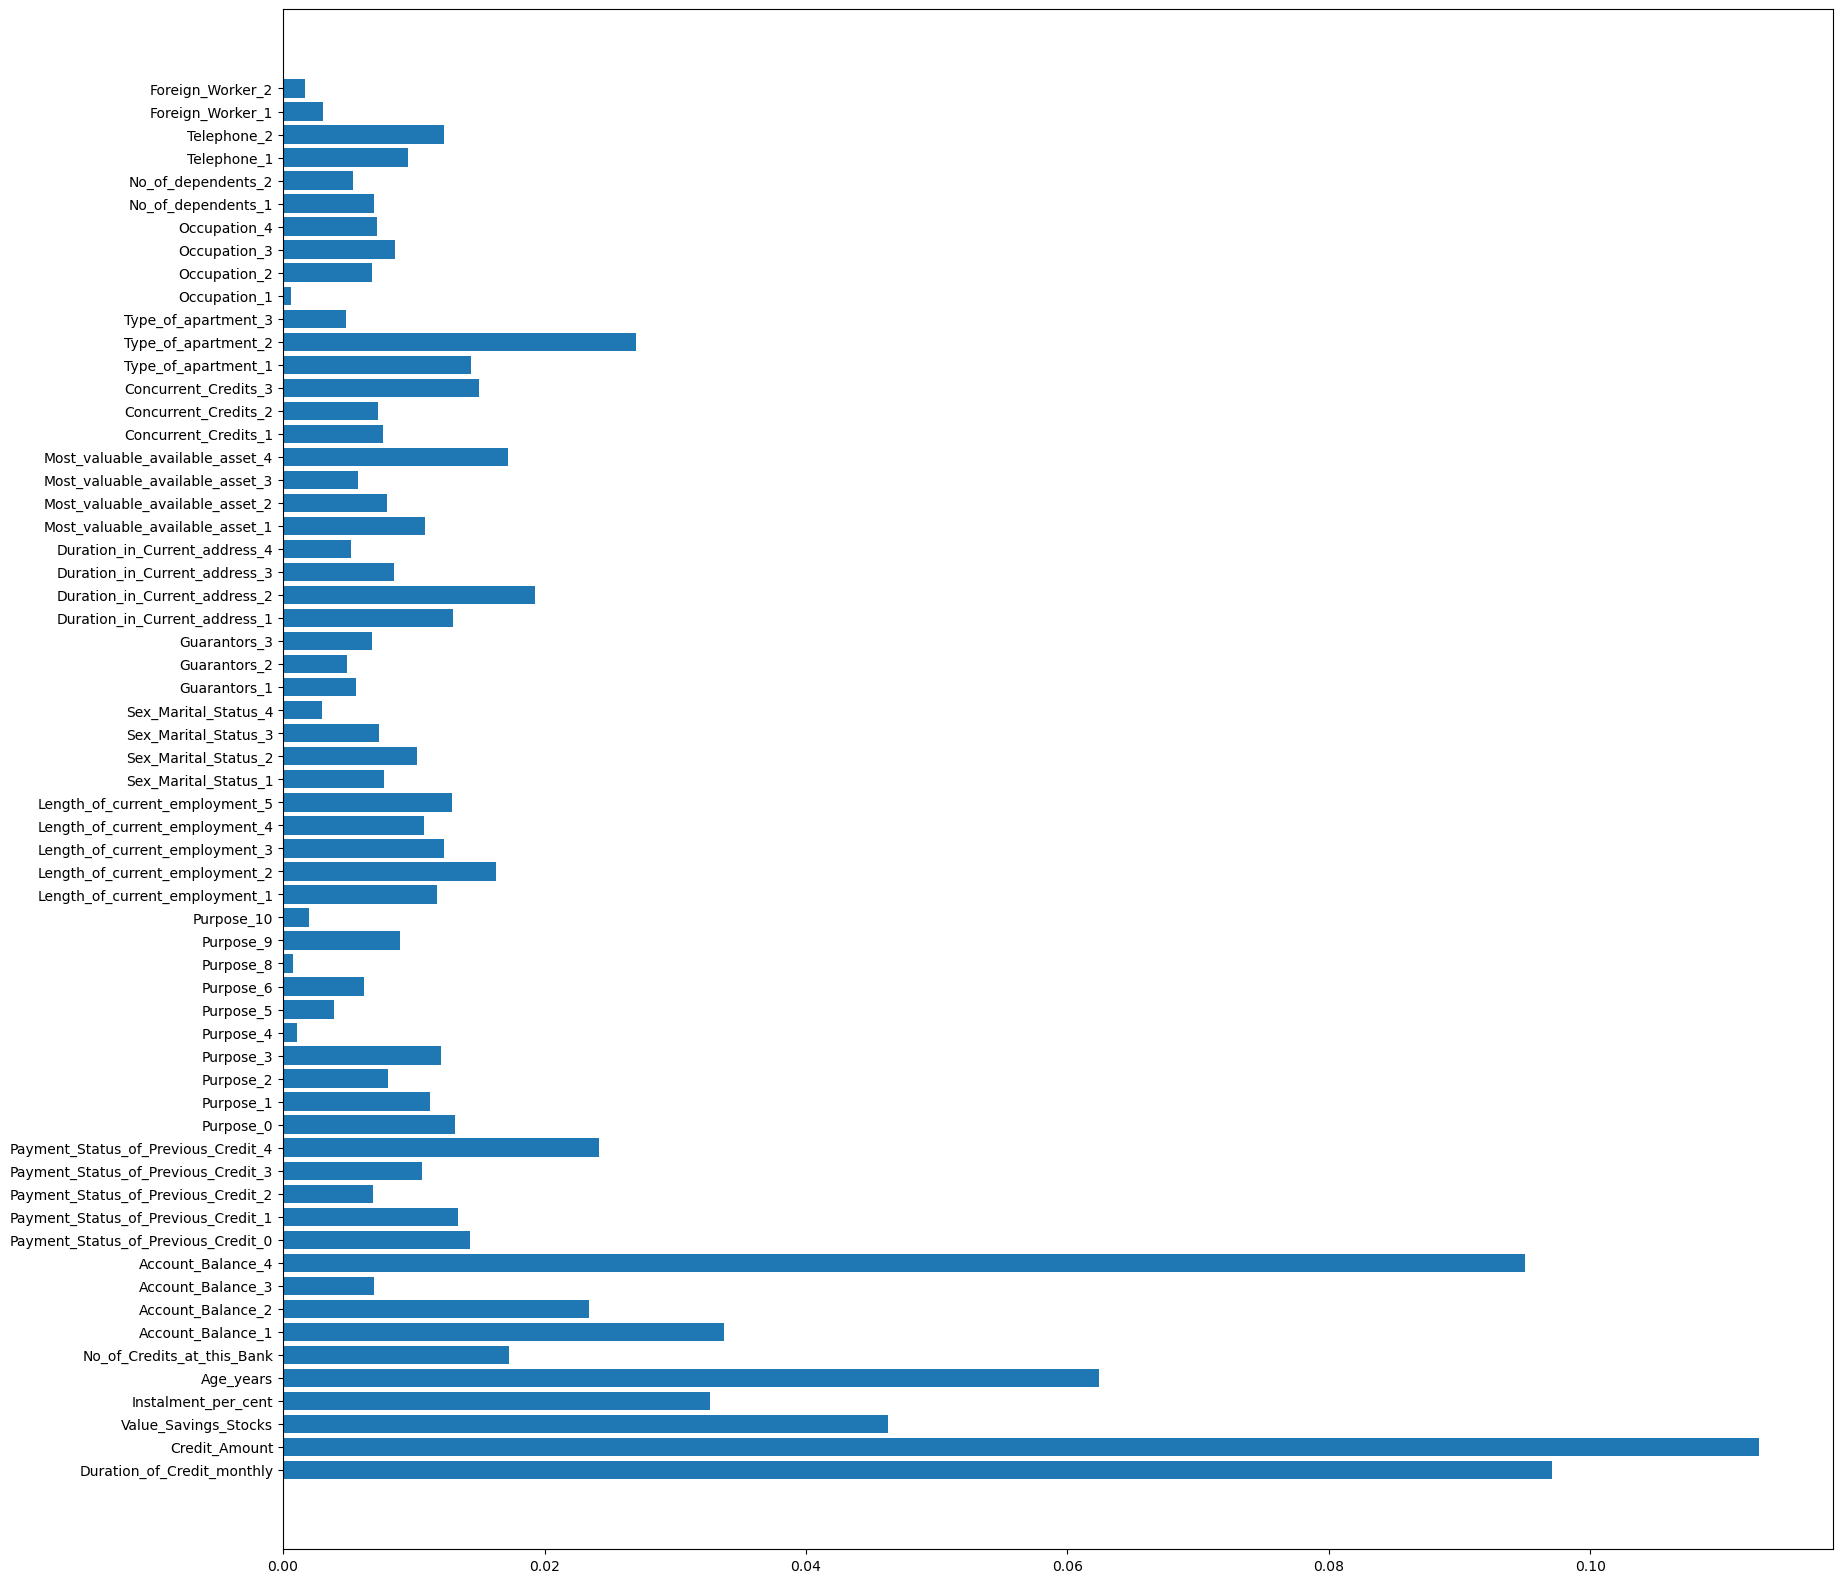

In [75]:
plt.figure(figsize=(20,20))
ax = plt.barh(list(X_base.columns),rf_clf.feature_importances_)

##### Shapley Value (Need to fix the display error)
* Values Based on Game Theory: Values derived from the principles of game theory.
* Values Obtained by Analyzing Changes with and without a Specific Feature: To determine the importance of a single feature, combinations of various features are created and the changes with and without the specific feature are analyzed.
* Explainable AI: Artificial intelligence that is designed to be transparent, interpretable, and understandable by humans.


In [85]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

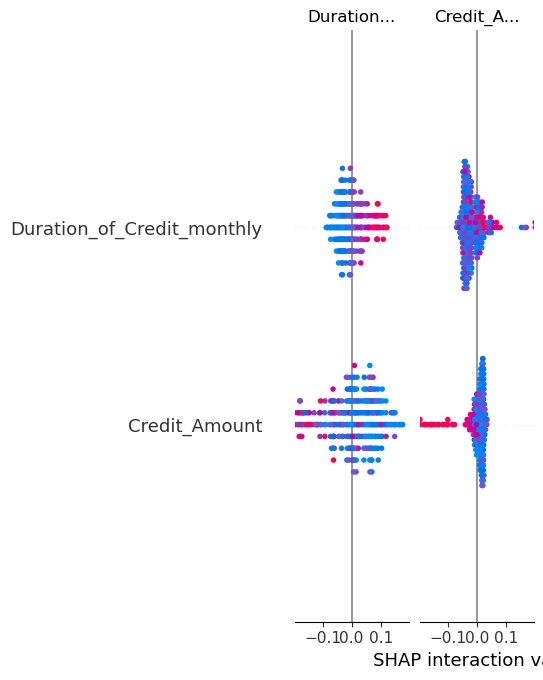

In [86]:
shap.summary_plot(shap_values, X_test)